In [6]:
import os
import sys

import os
cwd = os.getcwd()

cwd = '/'.join(cwd.split('/')[:-1])

def add_to_path(str):
    try:
        sys.path.index(str)
    except:
        sys.path.append(str)
        print(str + "\t add to the path list")
    else:
        print(str + "\t is already in the path list")

# this add all the libraris and scripts made for this project

add_to_path( cwd + "/datalib/")
add_to_path( cwd + "/khinsider-master/")
add_to_path( cwd + "/hilbert_curve/")

import numpy as np
import threading

/home/ubuntu/git_projects/IP-sound_retrive_usp/datalib/	 is already in the path list
/home/ubuntu/git_projects/IP-sound_retrive_usp/khinsider-master/	 is already in the path list
/home/ubuntu/git_projects/IP-sound_retrive_usp/hilbert_curve/	 is already in the path list


In [7]:
import hilbert

In [8]:
def kernel(output_data, start_i, end_i, hc, live, cicle_live, verbose=False):
    for i in range(start_i, end_i, 1):
#         if round((end_i - i)/(end_i - start_i), 3) == 0.500:
#             print("Half Way Here")
        output_data.append(hc.coordinates_from_distance(i))
#     print("Done")
    
    cicle_live[0] = False
    
    while live[0]:
        pass
    if verbose:
        print("Thread Ended")
    
# kernels = 64

def parallel_hilbert(kernels = 64, p=10, verbose=False):
    
    N = 2 # number of dimensions
#     p = 10 # number of iterations
    hc = hilbert.HilbertCurve(p, N)
    npts = 2**(N*p)
    pts = []

    
    step = npts//kernels

    proc_list = [None for i in range(kernels)]

    meta_container = [[] for _ in range(kernels)]
    state_container = [[True] for _ in range(kernels)]
    cicle_state_container = [[True] for _ in range(kernels)]
    last_id = 0
    index = 0
    for ii in range(step, npts + step, step):
        if verbose:
            print("Kernel {:d} instantiated".format(index + 1))

        proc_list[index] = threading.Thread(target=kernel,
                                            args=(meta_container[index], 
                                                  ii - step , ii, hc,
                                                  state_container[index],
                                                 cicle_state_container[index],
                                                 verbose))
        index += 1

        proc_list[index - 1].start()

        if verbose:
            print("Kernel {:d} Started".format(index))
            print("With data From {:d} to {:d}".format(ii - step , ii))
        last_id = ii

    if verbose:
        print("\n")

        if npts == last_id:
            print("Fully Coverage Success")
        else:
            print("Partial Coverage ERROR , diferentia :\t{:d}".format(last_id - npts))

    already_count = []
    still_working = True
    while still_working:
        still_working = False
        thread_id = 0
        for cicle_state in cicle_state_container:
            if not cicle_state[0] and thread_id not in already_count:
                already_count.append(thread_id)
                if verbose:
                    print("Thread {:d} Finish".format(thread_id + 1))            
            still_working += cicle_state[0]
            thread_id += 1
    
    if verbose:
        print("\nAll Threads are Finish, Waiting for data collection\t...")

    data_container = []
    for index in range(kernels):
        data_container += meta_container[index]
        state_container[index][0] = False

    if verbose:
        print("\nTotal Data{:d}\t Expected Coverage\t{:d}".format(len(data_container), npts))
    
    return data_container
    
# print(meta_container[0], len(meta_container[0]))

In [5]:
N = 2
p = 10
data_container = parallel_hilbert(128, p, False)
shape_side = int(N**p)
hilberth_2d_1d = np.zeros((shape_side, shape_side), int)

index = 0
for coords in data_container:
    if hilberth_2d_1d[coords[0], coords[1]] == 0:
        hilberth_2d_1d[coords[0], coords[1]] += index
    else:
        print(index, coords , "Already Occurs")
    index += 1

Thread Ended
Thread Ended
Thread EndedThread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended

Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended
Thread Ended

In [9]:
print(hilberth_2d_1d)

[[      0       3       4 ...  349523  349524  349525]
 [      1       2       7 ...  349522  349527  349526]
 [     14      13       8 ...  349533  349528  349529]
 ...
 [1048561 1048562 1048567 ...  699042  699047  699046]
 [1048574 1048573 1048568 ...  699053  699048  699049]
 [1048575 1048572 1048571 ...  699052  699051  699050]]


In [10]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

plt.ion()


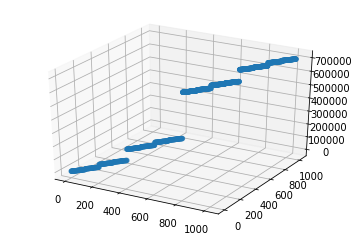

In [11]:
x = [i for i in range(shape_side)]
y = x

fig = plt.figure()
ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = hilberth_2d_1d[x][y]
# xline = x
# yline = y
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
# zdata = hilberth_2d_1d[x][y]
# xdata = x
# ydata = y
ax.scatter3D(x, y, hilberth_2d_1d[x, y]);


In [ ]:
np.save("./hilbert_12_data", hilberth_2d_1d)

In [ ]:
for pp in range(4, 14):
    print("Start\t{:d}".format(pp))
    
    name = "./pattern_{:d}_size".format(pp)
    
    crry = parallel_hilbert(128, pp, False)
    
    np.save(name, np.array(crry))
    
    print("Done")

Start	4
Done
Start	5
Done
Start	6
Done
Start	7
Done
Start	8
Done
Start	9
Done
Start	10
Done
Start	11
Done
Start	12
Done
Start	13



KeyboardInterrupt

